<h1> <center> Convergence of ANNs </center>  </h1>

<p> <font size = "4"> This Jupyter Notebook illustrates the effects of some of the parameters of ANNs on convergence during training.  Recall that ANNs have many minima and maxima so the gradient can go to zero for weight settings that are not near the solution. Furthermore, if the parameters are not appropriate, then the step size of the weight changes may be too big or too small.</font></p>

<p> <font size = "4"> The illustration uses the so-called **Cross Data Set**, which is an educational but not a real data set.  The Cross Data consists of two classes of 2D features.  For one class, the samples look something like a plus (+) sign (or a cross) whereas the samples in  the other class are distributed in the regions formed by the plus sign.  The data is displayed after cell [4].</font></p>

<p> <font size = "4"> The parameters investigated are the number of hidden units, the learning rate, and the momentum parameters.   I've selected 4 values for each parameter; they are listed in the text cells right after the Cross Data plot.  The procedure is explained there.  </font></p>
<p><br> </p>

<p>THE REMAINDER OF THIS TEST IS NOT REQUIRED BUT IT IS HERE IF YOU ARE INTERESTED:  </p>

<p> (1) There are many other parameters than can be varied.  If you know Python, or another programming language, you can see where the parameters are set in cell [6],  You can also read the documentation at the URLs: </p>

+ This one has all the parameters listed:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlp#sklearn.neural_network.MLPClassifier

+ This one is conceptual

https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

<p> (2) At the end of the repository, there are a couple cells that you can use to look at classification accuracies </p>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.neural_network as sknn

In [4]:
CrossData = np.loadtxt('crossnn.txt')

In [5]:
TrainData = CrossData[:200,:2]
Class1 = CrossData[:100,:2]
Class2 = CrossData[100:,:2]
Labels = CrossData[:200,2:]-1
Labels = np.reshape(Labels,(200,))

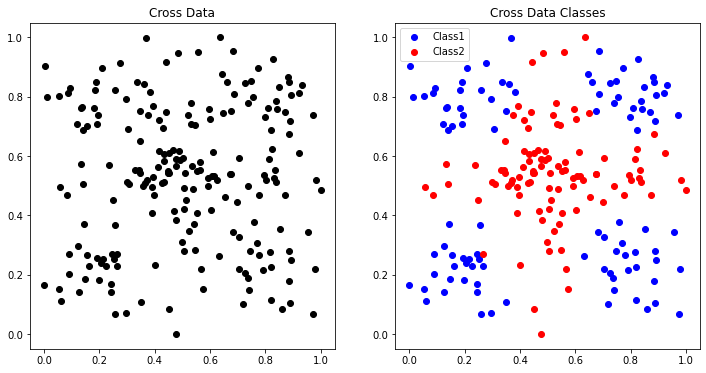

In [6]:
CrossFig = plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.scatter(TrainData[:,0], TrainData[:,1], c = 'k')
plt.title('Cross Data')
plt.subplot(1,2,2)
plt.scatter(Class1[:,0], Class1[:,1],c='b')
plt.scatter(Class2[:,0], Class2[:,1],c='r')
plt.legend(['Class1', 'Class2'])
plt.title('Cross Data Classes')
plt.show()

<h1> <center> Setting Parameters </h1>

<h2> Recall that each parameter has 4 possible values.  The procedure for investigating convergence is as follows: </h2>

<h3> For each experiment, select one parameter to vary and hold the others fixed as follows: </h3>

<ol>
    <li>  <font size = "4"> Vary the number of Hidden Units by setting Q = 'H' in cell [5]. </font> </li>
    <li>  <font size = "4"> Vary the Learning Rate by setting Q = 'L' in cell [5]. </font>  </li>
    <li>  <font size = "4"> Vary the Momentum by setting Q = 'M' in cell [5]. </font>  </li>
</ol>

<h3> and then executing the cell by putting the cursor in cell [5] and typing shift and enter simultaneously </h3>
    
<p> <font size = "4">  <b>Note:</b> The cell number will change once you execute it.</font> <br></p>

<h2> The parameter values are: </h2>


${\large \text{Quantity: Number of Hidden Units.}}$

${\large \text{Variable Name: H}}$

${\large \text{Values: 2,4,8,10}\\}$


${\large \text{Quantity: Learning Rate.}}$

${\large \text{Variable Name: L}}$

${\large \text{Values: 0.001,0.01,0.05, 0.1}\\}$


${\large \text{Quantity: Momentum.}}$

${\large \text{Variable Name: M}}$

${\large \text{Values: 0.0, 0.3, 0.6,0.9}\\}$


<p> <font size = "4">  <b>Note:</b> Feel free to choose other default values of the parameters in cell [5].  If you know Python, you can also change parameters in the code in cell [6] </font> <br></p>

In [7]:
######################
### CELL [5]       ###
### SET PARAMETERS ###
######################

### SET Q = 'H', 'L', or 'M' HERE ###
Q = 'H'

### I ALSO SET THE DEFAULT PARAMETERS HERE ###
H = int(12)
L = 0.15
M = 0.1

<h1> <center> Running an Experiment </h1>

<h2> Once you have selected the parameter to vary, you can run experiments.  An experiment consists of: </h2>

<ol>
    <li> <font size = "4"> Put your cursor in CELL [6] below. </font></li>
    <li>  <font size = "4"> Execute the cell by typing shift and enter simultaneously. </font></li>
    <li>  <font size = "4"> Make observations about the plots of the Loss function that displayed below the cell after execution. </font></li>
</ol>

<h2> Run several experiments with each specific parameter selection because training ANNs is a random process. </h2>

/Users/CISEGADER/anaconda3/envs/MayPy38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/CISEGADER/anaconda3/envs/MayPy38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/CISEGADER/anaconda3/envs/MayPy38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/CISEGADER/anaconda3/envs/MayPy38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization has

Final Loss for Parameter H =  2.000 is  0.525
Final Loss for Parameter H =  4.000 is  0.071
Final Loss for Parameter H =  8.000 is  0.077
Final Loss for Parameter H = 10.000 is  0.098


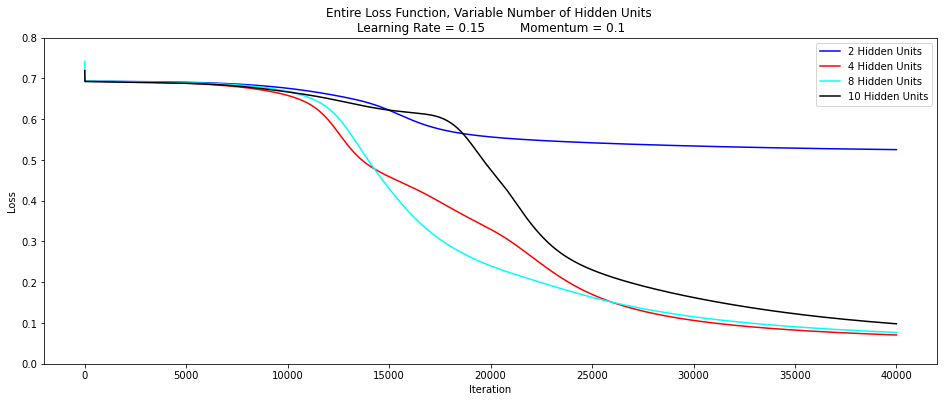

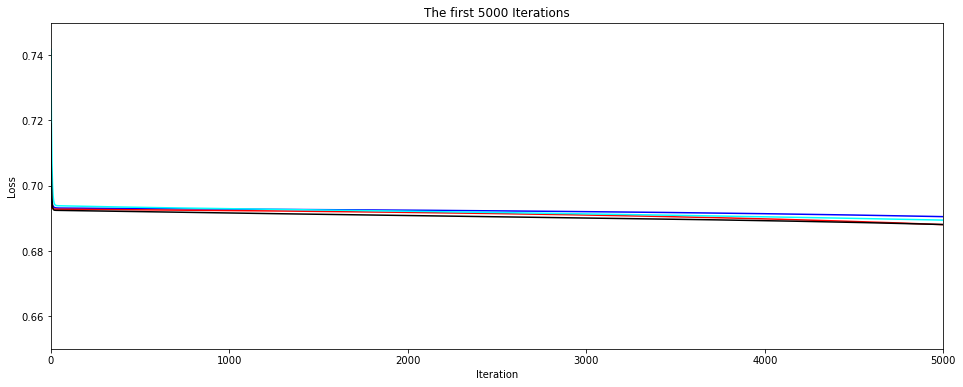

In [9]:
######################
### CELL [6]       ###
### RUN EXPERIMENT ###
######################

ListOfOnes = np.ones(4) #[1,1,1,1]
ListOfOnesH = np.array([1,1,1,1], dtype='int')
CrossANNs = list()

###################################################
### SETUP LOOP VALUES FOR VARYING ONE PARAMETER ###

if(Q == 'H'):
    HList = np.array([2,4,8,10], dtype='int')
    LList = [L,L,L,L]
    MList = [M,M,M,M]
    ParamList = HList
elif(Q == 'L'):
    LList = np.array([0.001,0.01,0.05,0.1])
    HList =[H,H,H,H]
    MList = [M,M,M,M]
    ParamList = LList
elif(Q == 'M'):
    LList = [L,L,L,L]
    HList = [H,H,H,H]
    MList = [0,0.3,0.6,0.9]
    ParamList = MList

#######################################
### LOOP THROUGH PARAMETER SETTINGS ###

for Hn,Ln,Mn in zip(HList,LList, MList):

    ##########################
    ### SET ANN PARAMETERS ###
    HiddenLayerSizes  = Hn
    NonLinearity      = 'logistic'
    TrainingType      = 'sgd'
    L2RegCoefficient  = 0
    BatchSize         = 200
    LearnRate         = 'constant'
    LearnRateInit     = Ln
    MaxNumIterations  = 40000
    Verbose           = False
    Momentum          = Mn
    UseValidation     = False
    Shuffle           = True
    PercentValidation = 0.2
    MinChange         = 0 #1e-8
    
    ######################
    ### INITIALIZE ANN ###
    
    InitCrossANN = sknn.MLPClassifier(hidden_layer_sizes = HiddenLayerSizes,\
                             activation          = NonLinearity,\
                             solver              = TrainingType,\
                             alpha               = L2RegCoefficient,\
                             learning_rate       = LearnRate,\
                             learning_rate_init  = LearnRateInit,\
                             batch_size          = BatchSize,\
                             max_iter            = MaxNumIterations,\
                             verbose             = Verbose,\
                             momentum            = Momentum,\
                             shuffle             = Shuffle,\
                             early_stopping      = False,\
                             validation_fraction = PercentValidation,\
                             tol                 = MinChange)
    
    #############################################################
    ### TRAIN ANN WITH THE PARAMETER SETTINGS IN THE LOOP AND ###
    ### STORE IT IN THE LIST CrossANNs                        ###
    
    TrainedCrossANN = InitCrossANN.fit(TrainData, Labels)
    CrossANNs.append(TrainedCrossANN)

######################
### END OF LOOP    ###

###########################
### PLOT LOSS FUNCTIONS ###
LegendStrs = []

##################
### SETUP PLOT ###
Clrs = ['blue','red','cyan','black']
plt.figure(figsize = (16,6))

########################################################
### PLOT ANN LOSS FUNCTIONS FOR DIFFERENT PARAMETERS ###

for ANN, n in zip(CrossANNs,[0,1,2,3]):
    NIters = len(ANN.loss_curve_)
    FinalLoss = ANN.loss_curve_[NIters-1]
    ParamVal     = ParamList[n]
    plt.plot(ANN.loss_curve_, c = Clrs[n])
    plt.ylim([0,0.8])
    PrtStr1 = f'Final Loss for Parameter {Q} = '
    PrtStr2 = '{0:6.3f} is {1:6.3f}'.format(ParamVal,FinalLoss)
    print(PrtStr1+PrtStr2)
    
#########################
### ANNOTATE PLOT     ###

LegendStrs = []
if(Q == 'H'):
    for Val in range(4):
        LegendStrs.append(f'{HList[Val]} Hidden Units')
    TitleStr = f'Entire Loss Function, Variable Number of Hidden Units \nLearning Rate = {L}         Momentum = {M}'
elif(Q == 'L'):
    for Val in range(4):
        LegendStrs.append(f'Learning Rate = {LList[Val]}')
    TitleStr = f'Entire Loss Function, Variable Learning Rate\nNumber of Hidden Units= {H}         Momentum = {M}'
elif(Q == 'M'):
    for Val in range(4):
        LegendStrs.append(f'Momentum = {MList[Val]}')
    TitleStr = f'Entire Loss Function, Variable Momentum \n Number of Hidden Units= {H}         Learning Rate = {L}'
plt.title(TitleStr)
plt.legend(LegendStrs)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

##########################
### MAKE A ZOOMED PLOT ###

plt.figure(figsize = (16,6))
ZoomIters          = 5000
for ANN, n in zip(CrossANNs,[0,1,2,3]):
    plt.plot(ANN.loss_curve_, c = Clrs[n])
plt.ylim([0.65,0.75])
plt.xlim([-2,ZoomIters])
plt.xlabel('Iteration')
plt.ylabel('Loss')
TitleStr = f'The first {ZoomIters} Iterations'
plt.title(TitleStr)
plt.show()

## If you want to see the classification rates,  outputs and  errors, execute the next two cells

Classification Rate for Parameter H =  2.000 is  76%
Classification Rate for Parameter H =  4.000 is  98%
Classification Rate for Parameter H =  8.000 is  98%
Classification Rate for Parameter H = 10.000 is  98%


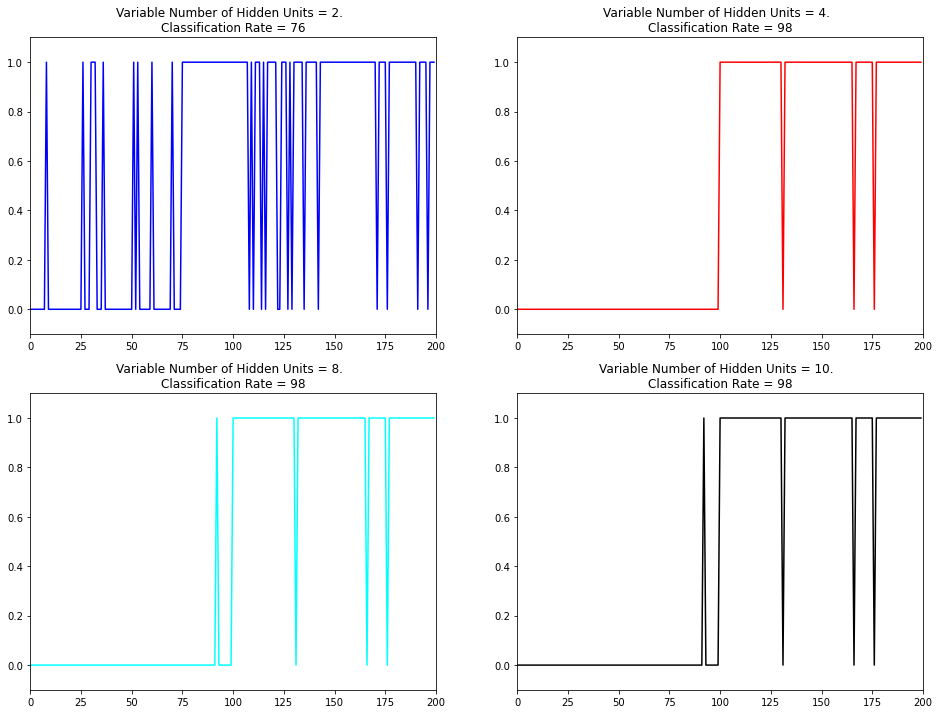

In [10]:
###### CLASSIFIER OUTPUT AND CLASSIFICATION RATES ###
plt.figure(figsize=(16,12))
for ANN, n in zip(CrossANNs,[0,1,2,3]):
    ParamVal     = ParamList[n]
    Y            = ANN.predict(TrainData)
    ClassRate    = int(round(100*ANN.score(TrainData,Labels)))
    plt.subplot(2,2,n+1)
    plt.plot(Y, c = Clrs[n])
    plt.ylim([-0.1,1.1])
    plt.xlim([0,200])
    PrtStr1 = f'Classification Rate for Parameter {Q} = '
    PrtStr2 = '{0:6.3f} is {1:3d}%'.format(ParamVal,ClassRate)
    print(PrtStr1+PrtStr2)
    
    if(Q == 'H'):
        TitleStr = f'Variable Number of Hidden Units = {HList[n]}.  \nClassification Rate = {ClassRate}'
    elif(Q == 'L'):
        TitleStr = f'Variable Learning Rate = {LList[n]}.  \nClassification Rate = {ClassRate}'
    elif(Q == 'M'):
        TitleStr = f' Variable Momentum = {MList[n]}.  \nClassification Rate = {ClassRate}'
    plt.title(TitleStr)

Errors1 are the samples from Class1 that are mis-classified as Class2 (Red called Blue).
Errors2 are the samples from Class2 that are mis-classified as Class1 (Blue called Red).


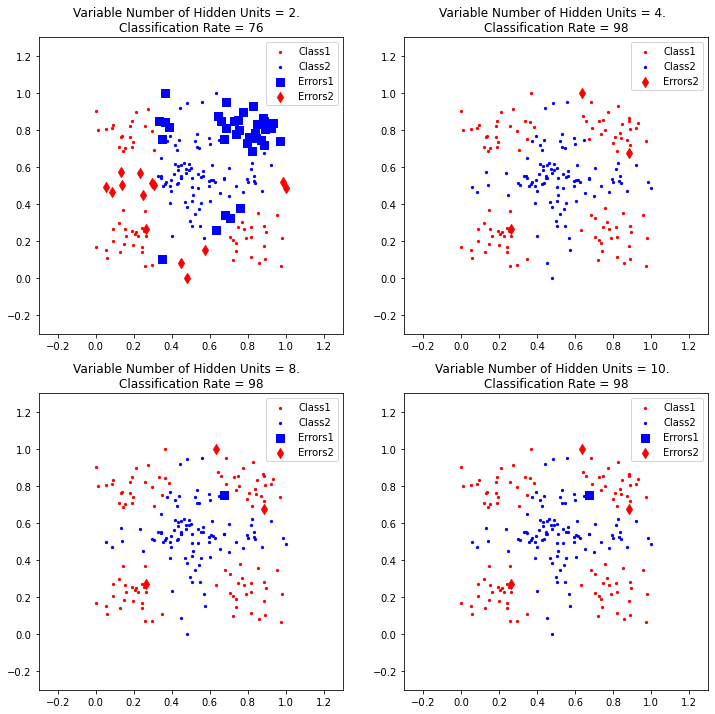

In [11]:
print('Errors1 are the samples from Class1 that are mis-classified as Class2 (Red called Blue).')
print('Errors2 are the samples from Class2 that are mis-classified as Class1 (Blue called Red).')

ErrorFig = plt.figure(figsize = (12,12))
for ANN, n in zip(CrossANNs,[0,1,2,3]):
    ParamVal     = ParamList[n]
    Y            = ANN.predict(TrainData)
    ClassRate    = int(round(100*ANN.score(TrainData,Labels)))
    Y1 = Y[:100]
    Y2 = Y[100:200]
    Bool1 = Y1>0.5
    Bool2 = Y2<0.5
    Errors1 = Class1[Bool1,:]
    Errors2 = Class2[Bool2,:]

    plt.subplot(2,2,n+1)
    plt.scatter(Class1[:,0], Class1[:,1], s = 5,c = 'r')
    plt.scatter(Class2[:,0], Class2[:,1], s = 5,c = 'b')
    plt.xlim([-0.3,1.3])
    plt.ylim([-0.3,1.3])

    if(Errors1.size > 0):
        plt.scatter(Errors1[:,0], Errors1[:,1],s = 50, c='b', marker="s")
    if(Errors2.size > 0):
        plt.scatter(Errors2[:,0], Errors2[:,1],s = 50, c='r', marker="d")

    if( (Errors1.size > 0) & (Errors2.size > 0)):
        plt.legend(['Class1', 'Class2', 'Errors1', 'Errors2'], fontsize=10)
    elif((Errors1.size == 0) & (Errors2.size == 0)):
        print('No Errors!')
    elif((Errors1.size == 0)):
        plt.legend(['Class1', 'Class2', 'Errors2'], fontsize=10)
    elif((Errors1.size == 0)):
        plt.legend(['Class1', 'Class2', 'Errors1'], fontsize=10)
    
    if(Q == 'H'):
        TitleStr = f'Variable Number of Hidden Units = {HList[n]}.  \nClassification Rate = {ClassRate}'
    elif(Q == 'L'):
        TitleStr = f'Variable Learning Rate = {LList[n]}.  \nClassification Rate = {ClassRate}'
    elif(Q == 'M'):
        TitleStr = f' Variable Momentum = {MList[n]}.  \nClassification Rate = {ClassRate}'
    plt.title(TitleStr)
plt.show()